In [2]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = "/content/SANAD_SUBSET.zip"

# Extract the ZIP file
extract_path = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
print("Extracted files:")
print(os.listdir(extract_path))


Extracted files:
['khaleej', 'akhbarona', 'arabiya']


In [3]:
import os

# List the extracted folder structure
extract_path = "/content/dataset"
for root, dirs, files in os.walk(extract_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


Root: /content/dataset
Directories: ['khaleej', 'akhbarona', 'arabiya']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej
Directories: ['Train', 'Test']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej/Train
Directories: ['Tech', 'Medical', 'Culture', 'Politics', 'Finance', 'Religion', 'Sports']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej/Train/Tech
Directories: []
Files: ['9dd0d3534468.txt', '082da6116f9f.txt', 'bb2722f5fde6.txt', 'ea884c4d5add.txt', '35ee9eb0de94.txt', 'b8f64f1f01b4.txt', 'd32f4594744c.txt', 'c8d869f715f8.txt', '04622b12f2c8.txt', 'c78f1ff04d8c.txt', '54b99858f0b0.txt', '021d6df1d9cf.txt', '1145453af41c.txt', 'ade5bf6cb889.txt', 'bd03b40964b4.txt', 'ddf0e376c8c0.txt', 'a0bcf55e6b17.txt', '5e52062c7aae.txt', 'd86403e894de.txt', '1b3299c449d9.txt', '9fad54a13c15.txt', '5ee4a00e6b8b.txt', '8cfbddf1ed04.txt', 'abb4757f0b57.txt', 'f17ab5818a

In [4]:
import os
from tqdm import tqdm
from bs4 import BeautifulSoup
import pandas as pd

def extract_text_from_file(file_path):
    """
    Extract text content from an HTML or plain text file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        try:
            # Try to parse as HTML
            soup = BeautifulSoup(file, 'html.parser')
            return soup.get_text()
        except Exception:
            # If parsing fails, read as plain text
            return file.read()

def prepare_dataset(root_folders, dataset_type):
    """
    Prepare dataset with text and class labels from multiple root folders.
    Args:
        root_folders (list): List of paths to root folders containing train and test folders.
        dataset_type (str): 'Train' or 'Test'.

    Returns:
        pd.DataFrame: A combined DataFrame with columns ['text', 'class'].
    """
    all_data = []

    for root_folder in root_folders:
        dataset_path = os.path.join(root_folder, dataset_type)
        if os.path.exists(dataset_path):  # Ensure the dataset folder exists
            for class_folder in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_type} dataset in {root_folder}"):
                class_path = os.path.join(dataset_path, class_folder)
                if os.path.isdir(class_path):  # Ensure it's a directory
                    for file_name in os.listdir(class_path):
                        file_path = os.path.join(class_path, file_name)
                        if os.path.isfile(file_path):  # Check if it's a file
                            text = extract_text_from_file(file_path)
                            all_data.append({'text': text, 'class': class_folder})

    return pd.DataFrame(all_data)

# Specify the root folders containing the dataset
root_folders = ["/content/dataset/arabiya", "/content/dataset/akhbarona", "/content/dataset/khaleej"]

# Prepare train and test datasets
train_dataset = prepare_dataset(root_folders, "Train")
test_dataset = prepare_dataset(root_folders, "Test")

# Display a sample of the datasets
print(train_dataset.head())
print(test_dataset.head())


Processing Train dataset in /content/dataset/arabiya: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]
Processing Train dataset in /content/dataset/akhbarona: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
Processing Train dataset in /content/dataset/khaleej: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]
Processing Test dataset in /content/dataset/arabiya: 100%|██████████| 5/5 [00:00<00:00, 26.15it/s]
Processing Test dataset in /content/dataset/akhbarona: 100%|██████████| 7/7 [00:00<00:00, 13.54it/s]
Processing Test dataset in /content/dataset/khaleej: 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                                                text class
0  Title\nتويتر يغلق 360 ألف حساب يروج للإرهاب خل...  Tech
1  Title\nهكذا تحظر الرسائل القصيرة على آيفون\nSo...  Tech
2  Title\nكم تدفع غوغل لاختبار سيارتها الذاتية؟\n...  Tech
3  Title\nآبل تكشف عن آيباد وآيماك الجديدين في 16...  Tech
4  Title\nكيف تتجنب المواقع الخبيثة على الإنترنت؟...  Tech
                                                text class
0  Title\nطريقة التحكم في استقبال الوسائط على وات...  Tech
1  Title\nكيفية مقارنة آيفون 7 بمنافسيه في الأسوا...  Tech
2  Title\nفيسبوك يتعطل للمرة الثانية خلال أيام\nS...  Tech
3  Title\nمستقبل المدن الذكية في معرض إنترنت الأش...  Tech
4  Title\nتابع آخر الأخبار على تويتر دون حساب\nSo...  Tech


In [5]:
train_dataset

,text,class
0,Title\nتويتر يغلق 360 ألف حساب يروج للإرهاب خل...,Tech
1,Title\nهكذا تحظر الرسائل القصيرة على آيفون\nSo...,Tech
2,Title\nكم تدفع غوغل لاختبار سيارتها الذاتية؟\n...,Tech
3,Title\nآبل تكشف عن آيباد وآيماك الجديدين في 16...,Tech
4,Title\nكيف تتجنب المواقع الخبيثة على الإنترنت؟...,Tech
...,...,...
99805,Body\nعمق هرتا برلين جراح ضيفه هامبورغ صاحب ال...,Sports
99806,Body\nأخفق المهاجمان الأرجنتيني ليونيل ميسي وا...,Sports
99807,Body\nصعد بايرن ميونيخ وصيف بطل الموسم الماضي ...,Sports
99808,Body\nانتزع أرسنال المركز الرابع بفوز قاتل وثم...,Sports


In [6]:
test_dataset

,text,class
0,Title\nطريقة التحكم في استقبال الوسائط على وات...,Tech
1,Title\nكيفية مقارنة آيفون 7 بمنافسيه في الأسوا...,Tech
2,Title\nفيسبوك يتعطل للمرة الثانية خلال أيام\nS...,Tech
3,Title\nمستقبل المدن الذكية في معرض إنترنت الأش...,Tech
4,Title\nتابع آخر الأخبار على تويتر دون حساب\nSo...,Tech
...,...,...
11085,Body\nآخر مرة شوهد فيها المهاجم الأوروغواني لو...,Sports
11086,Body\nلحق البريطاني اندي موراي المصنف أول بالص...,Sports
11087,Body\nأعلن فيسنتي ديل بوسكي المدير الفني للمنت...,Sports
11088,Body\nالقاهرة: «الخليج» يصل اليوم إلى القاهرة ...,Sports


In [7]:
import re

def clean_text(text):
    """
    Clean the text by:
    - Removing newline characters (\n).
    - Keeping only Arabic text (remove non-Arabic characters).
    - Replacing multiple spaces with a single space.
    """
    # Remove all newline characters
    text = text.replace('\n', ' ').strip()

    # Remove non-Arabic characters (e.g., English, special symbols)
    text = re.sub(r'[^ا-ي\s]', '', text)  # Keep only Arabic letters and spaces

    # Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning to train and test datasets
train_dataset["text"] = train_dataset["text"].apply(clean_text)
test_dataset["text"] = test_dataset["text"].apply(clean_text)

# Verify the cleaned data
print(train_dataset.head())


                                                text class
0  تويتر يغلق لف حساب يروج للرهاب خلال عام دبي قن...  Tech
1  هكذا تحظر الرسال القصيرة على يفون دبي البوابة ...  Tech
2  كم تدفع غوغل لاختبار سيارتها الذاتية دبي البوا...  Tech
3  بل تكشف عن يباد ويماك الجديدين في كتوبر دبي ال...  Tech
4  كيف تتجنب المواقع الخبيثة على النترنت دبي البو...  Tech


<ipython-input-8-d6484431c18b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


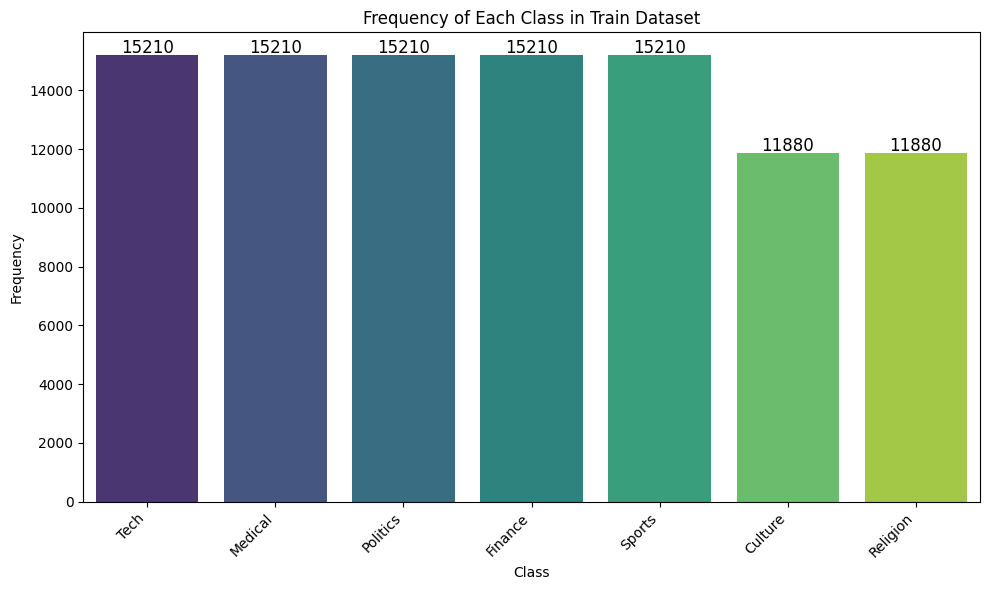

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each class in the 'class' column
class_counts = train_dataset['class'].value_counts()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with explicit hue assignment
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Train Dataset')

# Rotate the x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
!pip install datasets
from datasets import Dataset

# Convert train and test pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_dataset)
test_dataset = Dataset.from_pandas(test_dataset)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [21]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Tokenize datasets
train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

# Map class labels to integers
label_mapping = {label: idx for idx, label in enumerate(unique_classes)}
print("Label Mapping:", label_mapping)

# Add labels column
train_tokenized = train_tokenized.map(lambda example: {"labels": label_mapping[example["class"]]})
test_tokenized = test_tokenized.map(lambda example: {"labels": label_mapping[example["class"]]})

print(train_tokenized[0])  # Check the first sample
print(test_tokenized[0])  # Check the first sample

train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/99810 [00:00<?, ? examples/s]

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

Label Mapping: {'Medical': 0, 'Culture': 1, 'Finance': 2, 'Religion': 3, 'Sports': 4, 'Politics': 5, 'Tech': 6}


Map:   0%|          | 0/99810 [00:00<?, ? examples/s]

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

{'text': 'تويتر يغلق لف حساب يروج للرهاب خلال عام دبي قناة العربية علن موقع تويتر عن غلاق لف حساب مرتبط بالترويج لـ االرهاب منذ منتصف عام وتعرض موقع تويتر في السابق لانتقادات من واشنطن وجهات خرى ترى ن الموقع لا يبذل ما يكفي لوقف حسابات مرتبطة بمتطرفين في تنظيم داعش لكن الموقع ومنذ شباطفبراير الماضي وقف لف حساب خر بعد وقف لفا منذ منتصف غلبها مرتبط بداعش وقال تويتر ن عمليات الوقف اليومية لحسابات مرتبطة بالرهاب قفزت بنسبة منذ العام الماضي ونه قلص الوقت الذي يستغرقه في الاستجابة وثنت جماعات مراقبة على رد تويتر السريع على احتفالات على النترنت من متطرفين مرتبطين بداعش ثنوا على هجوم بشاحنة في تموزيوليو في نيس بفرنسا ودى بحياة كثر من شخصا ويعتمد تويتر في الساس على بلاغات من المستخدمين بشن الحسابات المسية وقال الموقع نه وسع حجم الفريق الذي يقوم بمراجعة هذه البلاغات', 'class': 'Tech', 'input_ids': [33, 5722, 7966, 10186, 1861, 11776, 162, 9915, 3442, 455, 359, 1799, 1852, 251, 6958, 57775, 251, 8195, 1099, 5722, 322, 16225, 198, 10186, 1861, 3461, 4350, 16403, 22814, 32, 23349, 211, 3442, 731, 3

In [22]:
from transformers import AutoModelForSequenceClassification

# Load AraBERT with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv2",
    num_labels=num_labels
)


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",           # Directory to save model checkpoints
    evaluation_strategy="epoch",     # Evaluate at the end of each epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Weight decay
    logging_dir="./logs",            # Directory for logs
    logging_steps=50,                # Log every 50 steps
    save_strategy="epoch",           # Save checkpoints at the end of each epoch
    load_best_model_at_end=True,     # Load the best model based on evaluation
    metric_for_best_model="eval_loss", # Use loss to select the best model
    save_total_limit=2,              # Limit the number of saved checkpoints
    fp16=True                        # Enable mixed precision training (faster with GPU)
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [24]:
from transformers import Trainer

trainer = Trainer(
    model=model,                        # The AraBERT model
    args=training_args,                 # Training arguments
    train_dataset=train_tokenized,      # Tokenized training dataset
    eval_dataset=test_tokenized,        # Tokenized test dataset
    tokenizer=tokenizer                 # Tokenizer used for preprocessing
)


<ipython-input-24-51b5def00f65>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [25]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.106600,0.143063
2,0.102100,0.138899
3,0.036800,0.151380


TrainOutput(global_step=18717, training_loss=0.1221368211790901, metrics={'train_runtime': 2856.8979, 'train_samples_per_second': 104.809, 'train_steps_per_second': 6.552, 'total_flos': 1.9696720031424e+16, 'train_loss': 0.1221368211790901, 'epoch': 3.0})

In [26]:
results = trainer.evaluate()
print("Evaluation Results:", results)


Evaluation Results: {'eval_loss': 0.13889864087104797, 'eval_runtime': 20.8979, 'eval_samples_per_second': 530.675, 'eval_steps_per_second': 33.209, 'epoch': 3.0}


In [29]:
model.save_pretrained("./results")
tokenizer.save_pretrained("./results")


('./results/tokenizer_config.json',
 './results/special_tokens_map.json',
 './results/vocab.txt',
 './results/added_tokens.json',
 './results/tokenizer.json')

In [30]:
from transformers import pipeline

# Load the fine-tuned model and tokenizer
classifier = pipeline("text-classification", model="./results", tokenizer="./results", framework="pt")

# Test on a new example
example_text = "هذا نص تجريبي لمعرفة نتيجة التصنيف."
prediction = classifier(example_text)

print("Prediction:", prediction)


Device set to use cuda:0


Prediction: [{'label': 'LABEL_1', 'score': 0.98737633228302}]


In [31]:
example_texts = [
    "هذا مقال عن الرياضة",
    "هذا نص عن السياسة",
    "هذا نص عن التكنولوجيا",
]
for text in example_texts:
    prediction = classifier(text)
    print(f"Text: {text}\nPrediction: {prediction}\n")


Text: هذا مقال عن الرياضة
Prediction: [{'label': 'LABEL_3', 'score': 0.5140969157218933}]

Text: هذا نص عن السياسة
Prediction: [{'label': 'LABEL_3', 'score': 0.7876635193824768}]

Text: هذا نص عن التكنولوجيا
Prediction: [{'label': 'LABEL_6', 'score': 0.49010568857192993}]



In [35]:
print("Label Mapping:", label_mapping)
print("Unique classes in test_dataset:", set(example["class"] for example in test_dataset))


Label Mapping: {0: 'Medical', 1: 'Culture', 2: 'Finance', 3: 'Religion', 4: 'Sports', 5: 'Politics', 6: 'Tech'}
Unique classes in test_dataset: {'Medical', 'Culture', 'Finance', 'Religion', 'Sports', 'Politics', 'Tech'}


In [36]:
print(test_dataset[:5])  # Print the first 5 examples


{'text': ['طريقة التحكم في استقبال الوساط على واتساب في يفون دبي البوابة العربية للخبار التقنية طلقت شركة واتساب قبل يام قليلة تحديثا جديدا لتطبيقها الخاص بنظام تشغيل وجلب معه التحديث العديد من الميزات الجديدة برزها كان مكانية منع الوساط التي يتم رسالها للمستخدم من التحميل بشكل مباشر ويمكن لمستخدمي واتساب على جهزة يفون بعد التحديث الجديد الذهاب لى ومن ثم وبعد فتح الخيار الجديد والذي يمكن عن طريقه تحديد سلوب استقبال الصور ومقاطع الصوت والفيديو ويمكن السماح لهذه الوساط بالتحميل تلقايا عند وجود اتصال واي فاي و عند وجود اتصال واي فاي و شبكة هاتف بالضافة لى مكانية منعها من التحميل بشكل تلقاي مع العلم ن الميزة الجديدة التي تيحت لمستخدمي واتساب على جهزة متوفرة منذ فترة لمستخدمي واتساب على ندرويد', 'كيفية مقارنة يفون بمنافسيه في السواق دبي البوابة العربية للخبار التقنية علنت شركة بل قبل يام عن حدث هواتفها الذكية يفون ويفون بلس وكان الجز الهم في العلان ن هواتفها الجديدة جات مطابقة تماما للتوقعات وعلى الرغم من ن الهواتف الجديدة تشبه تماما هاتف يفون ويفون بلس من حيث الشكل والمواصفات لا ن هناك بعض

In [39]:
from sklearn.metrics import classification_report

# Generate predictions for the test dataset
try:
    y_pred = [
        label_mapping[int(classifier(example["text"])[0]["label"].split("_")[-1])]
        for example in test_dataset
    ]
    y_true = [label_mapping[example["class"]] for example in test_dataset]

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=list(label_mapping.values())))

except KeyError as e:
    print(f"KeyError: Missing label in label_mapping: {e}")
except RuntimeError as e:
    print(f"RuntimeError: {e}")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


RuntimeError: The size of tensor a (1641) must match the size of tensor b (512) at non-singleton dimension 1


In [41]:
def preprocess_for_prediction(text):
    # Tokenize and truncate the text
    tokenized_input = tokenizer(
        text,
        truncation=True,
        max_length=512,
        padding="max_length",
        return_tensors="pt"
    )
    return tokenized_input


In [43]:
import torch
from sklearn.metrics import classification_report

try:
    y_pred = []
    y_true = []
    for example in test_dataset:
        # Preprocess the text
        tokenized_input = preprocess_for_prediction(example["text"])

        # Send to GPU if available
        tokenized_input = {key: val.to("cuda") for key, val in tokenized_input.items()}

        # Get the model output
        output = model(**tokenized_input)

        # Extract the predicted label
        predicted_label = torch.argmax(output.logits, dim=1).item()
        y_pred.append(predicted_label)

        # Append the true label
        y_true.append(label_mapping[example["class"]])

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=list(label_mapping.values())))

except KeyError as e:
    print(f"KeyError: Missing label in label_mapping: {e}")
except RuntimeError as e:
    print(f"RuntimeError: {e}")


KeyError: Missing label in label_mapping: 'Tech'


In [44]:
print("Unique labels in test_dataset:", set(example["class"] for example in test_dataset))

label_mapping = {
    "Medical": 0,
    "Culture": 1,
    "Finance": 2,
    "Religion": 3,
    "Sports": 4,
    "Politics": 5,
    "Tech": 6  # Ensure this is added
}

try:
    y_pred = []
    y_true = []
    for example in test_dataset:
        # Preprocess the text
        tokenized_input = preprocess_for_prediction(example["text"])
        tokenized_input = {key: val.to("cuda") for key, val in tokenized_input.items()}
        output = model(**tokenized_input)
        predicted_label = torch.argmax(output.logits, dim=1).item()
        y_pred.append(predicted_label)
        y_true.append(label_mapping.get(example["class"], -1))  # Use -1 for unknown classes
    print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))
except KeyError as e:
    print(f"KeyError: Missing label in label_mapping: {e}")
except RuntimeError as e:
    print(f"RuntimeError: {e}")



Unique labels in test_dataset: {'Medical', 'Culture', 'Finance', 'Religion', 'Sports', 'Politics', 'Tech'}
              precision    recall  f1-score   support

     Medical       0.97      0.99      0.98      1690
     Culture       0.95      0.97      0.96      1320
     Finance       0.96      0.95      0.96      1690
    Religion       0.98      0.97      0.98      1320
      Sports       0.99      0.99      0.99      1690
    Politics       0.97      0.94      0.96      1690
        Tech       0.96      0.98      0.97      1690

    accuracy                           0.97     11090
   macro avg       0.97      0.97      0.97     11090
weighted avg       0.97      0.97      0.97     11090



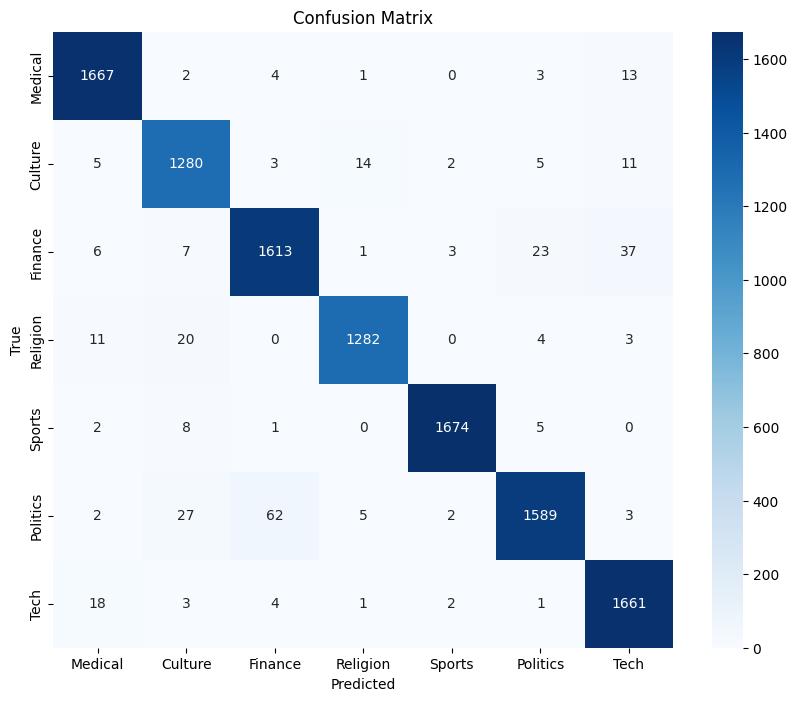

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [65]:
test_texts = [
    "هذا مقال عن الطب والصحة",
    "تحدث المقال عن آخر التطورات الثقافية",
    "ناقش النص مواضيع اقتصادية مهمة",
    "هذا نص يتحدث عن الدين والروحانية",
    "تحدث المقال عن مباراة كرة القدم الأخيرة",
    "تناول النص آخر ابتكارات التكنولوجيا الحديثة",
    "ناقش النص سوق الأسهم والتغيرات المالية",
    "تناول المقال القرارات السياسية الجديدة وتأثيرها على المجتمع",
]
for text in test_texts:
    tokenized_input = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    tokenized_input = {key: val.to("cuda") for key, val in tokenized_input.items()}
    output = model(**tokenized_input)
    predicted_label = torch.argmax(output.logits, dim=1).item()
    predicted_class = list(label_mapping.keys())[predicted_label]
    print(f"Text: {text}\nPredicted class: {predicted_class}\n")


Text: هذا مقال عن الطب والصحة
Predicted class: Medical

Text: تحدث المقال عن آخر التطورات الثقافية
Predicted class: Culture

Text: ناقش النص مواضيع اقتصادية مهمة
Predicted class: Finance

Text: هذا نص يتحدث عن الدين والروحانية
Predicted class: Religion

Text: تحدث المقال عن مباراة كرة القدم الأخيرة
Predicted class: Sports

Text: تناول النص آخر ابتكارات التكنولوجيا الحديثة
Predicted class: Tech

Text: ناقش النص سوق الأسهم والتغيرات المالية
Predicted class: Finance

Text: تناول المقال القرارات السياسية الجديدة وتأثيرها على المجتمع
Predicted class: Politics



In [67]:
import torch
import torch.nn as nn
import math

class DifferentialMultiHeadAttention(nn.Module):
    """
    Multi-Head Attention with a Differential Attention Mechanism.
    """
    def __init__(self, embed_dim, num_heads, dropout=0.1, lambda_init=0.8):
        super(DifferentialMultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by the number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear layers for Q, K, V projections
        self.q_proj1 = nn.Linear(embed_dim, embed_dim)
        self.q_proj2 = nn.Linear(embed_dim, embed_dim)
        self.k_proj1 = nn.Linear(embed_dim, embed_dim)
        self.k_proj2 = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

        # Learnable parameters for lambda
        self.lambda_q1 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_k1 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_q2 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_k2 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_init = lambda_init

        # Dropout and scaling
        self.dropout = nn.Dropout(dropout)
        self.scale = math.sqrt(self.head_dim)

    def forward(self, query, key, value, mask=None):
        batch_size, seq_len, _ = query.size()

        # Project Q1, Q2, K1, K2, and V
        Q1 = self.q_proj1(query).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        Q2 = self.q_proj2(query).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K1 = self.k_proj1(key).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K2 = self.k_proj2(key).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.v_proj(value).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # Compute scaled dot-product attention scores
        scores_1 = torch.matmul(Q1, K1.transpose(-2, -1)) / self.scale
        scores_2 = torch.matmul(Q2, K2.transpose(-2, -1)) / self.scale

        # Compute lambda
        lambda_val = (
            torch.exp(torch.sum(self.lambda_q1 * self.lambda_k1, dim=-1)) -
            torch.exp(torch.sum(self.lambda_q2 * self.lambda_k2, dim=-1)) +
            self.lambda_init
        )

        # Compute differential attention scores
        diff_attention_scores = torch.softmax(scores_1, dim=-1) - lambda_val.unsqueeze(1).unsqueeze(2) * torch.softmax(scores_2, dim=-1)

        # Apply mask if provided
        if mask is not None:
            diff_attention_scores = diff_attention_scores.masked_fill(mask == 0, float('-inf'))

        # Normalize attention scores
        attention_probs = torch.softmax(diff_attention_scores, dim=-1)
        attention_probs = self.dropout(attention_probs)

        # Compute attention output
        context = torch.matmul(attention_probs, V)
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, self.embed_dim)

        # Final output projection
        output = self.out_proj(context)

        return output


In [69]:
print(output.logits.shape)  # Should match the expected output shape
print(torch.isnan(output.logits).any())  # Check for invalid values in logits


torch.Size([1, 7])
tensor(False, device='cuda:0')


In [70]:
import torch.nn.functional as F

# Convert logits to probabilities
probs = F.softmax(output.logits, dim=1)
print("Probabilities:", probs)

# Get the predicted class
predicted_class = torch.argmax(probs, dim=1).item()
print("Predicted class:", predicted_class)


Probabilities: tensor([[0.0030, 0.0468, 0.0036, 0.0170, 0.0010, 0.9230, 0.0056]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: 5


In [71]:
# Map the predicted class index to the corresponding label
predicted_label = list(label_mapping.keys())[predicted_class]
print(f"Predicted Label: {predicted_label}")


Predicted Label: Politics


In [72]:
from transformers.models.bert.modeling_bert import BertModel, BertSelfAttention, BertLayer

# Custom BertSelfAttention with Differential Attention
class CustomBertSelfAttention(BertSelfAttention):
    def __init__(self, config):
        super().__init__(config)
        self.custom_attention = DifferentialMultiHeadAttention(
            embed_dim=config.hidden_size,
            num_heads=config.num_attention_heads,
            dropout=config.attention_probs_dropout_prob,
        )

    def forward(self, hidden_states, attention_mask=None, **kwargs):
        return self.custom_attention(hidden_states, hidden_states, hidden_states, attention_mask)


# Modify specific layers in the BERT model
class ModifiedBertModel(BertModel):
    def __init__(self, config, replace_layers):
        super().__init__(config)
        self.replace_layers = replace_layers  # Indices of layers to replace

        for layer_idx in self.replace_layers:
            self.encoder.layer[layer_idx].attention.self = CustomBertSelfAttention(config)

# Specify layers to replace
replace_layers = [2, 5, 8]  # Replace 25% of the layers (indices: 2, 5, 8)
config = model.config  # Get the existing model configuration

# Instantiate modified model
modified_model = ModifiedBertModel(config, replace_layers)


In [75]:
class DifferentialMultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super(DifferentialMultiHeadAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(
        self,
        hidden_states,
        attention_mask=None,
        head_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        *args,
        **kwargs
    ):
        # Compute Q, K, V projections
        Q = self.q_proj(hidden_states)
        K = self.k_proj(hidden_states if encoder_hidden_states is None else encoder_hidden_states)
        V = self.v_proj(hidden_states if encoder_hidden_states is None else encoder_hidden_states)

        # Calculate attention scores
        attention_scores = torch.matmul(Q, K.transpose(-1, -2))
        attention_probs = torch.softmax(attention_scores, dim=-1)
        attention_probs = self.dropout(attention_probs)

        # Context computation
        context = torch.matmul(attention_probs, V)

        # Final projection
        output = self.out_proj(context)
        return output


In [76]:
from transformers import BertModel

# Load your pre-trained model
model = BertModel.from_pretrained("aubmindlab/bert-base-arabertv2")

# Replace attention layers in a subset of encoder layers
num_replaced_layers = len(model.encoder.layer) // 4  # Replace 25% of layers
for i in range(num_replaced_layers):
    model.encoder.layer[i].attention.self = DifferentialMultiHeadAttention(
        embed_dim=model.config.hidden_size,
        num_heads=model.config.num_attention_heads
    )

print(f"Replaced {num_replaced_layers} layers with DifferentialMultiHeadAttention.")


Replaced 3 layers with DifferentialMultiHeadAttention.


In [77]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./modified_results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./modified_logs",
    logging_steps=50,
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-77-589d3cfb65f1>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TypeError: can only concatenate tuple (not "Tensor") to tuple